# Importações

In [1]:
import sys
path_to_module = 'c:/users/thiag/documents/ia_ufc/venv/lib/site-packages'
sys.path.append(path_to_module)
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Inicializando o gerador de imagens para fazer o pré-processamento

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# pre-processamento das imagens de treino
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        seed = 42)

Found 28709 images belonging to 7 classes.


In [4]:
# pre-processamento das imagens de treino
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        seed = 42)

Found 7178 images belonging to 7 classes.


## Classes do modelo

In [5]:
classes = train_generator.class_indices
classes

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# Criando a estrutura do modelo

In [6]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

Definição do modelo sequencial. Inicialmente são aplicados nas imagens um layer de convolução, seguido de um layer de Pooling cujo máximo é extraído. Ao repertirmos o processo algumas vezes, obtemos matrizes que resumem as propriedades gerais das imagens para serem utilizadas na rede neural.

In [7]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [8]:
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

Aplainamento do modelo e aplicação dos nós densos da rede.

In [9]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [10]:
cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

In [11]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50


C:\Users\thiag\AppData\Local\Temp/ipykernel_10516/1151617337.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


448/448 [==============================] - 207s 460ms/step - loss: 1.8088 - accuracy: 0.2533 - val_loss: 1.7436 - val_accuracy: 0.3040
Epoch 2/50
448/448 [==============================] - 219s 489ms/step - loss: 1.6489 - accuracy: 0.3573 - val_loss: 1.5659 - val_accuracy: 0.4050
Epoch 3/50
448/448 [==============================] - 210s 470ms/step - loss: 1.5491 - accuracy: 0.4015 - val_loss: 1.4836 - val_accuracy: 0.4340
Epoch 4/50
448/448 [==============================] - 210s 468ms/step - loss: 1.4778 - accuracy: 0.4317 - val_loss: 1.4239 - val_accuracy: 0.4607
Epoch 5/50
448/448 [==============================] - 209s 467ms/step - loss: 1.4138 - accuracy: 0.4594 - val_loss: 1.3577 - val_accuracy: 0.4809
Epoch 6/50
448/448 [==============================] - 209s 467ms/step - loss: 1.3607 - accuracy: 0.4827 - val_loss: 1.3256 - val_accuracy: 0.4934
Epoch 7/50
448/448 [==============================] - 208s 465ms/step - loss: 1.3142 - accuracy: 0.5026 - val_loss: 1.2966 - val_accura

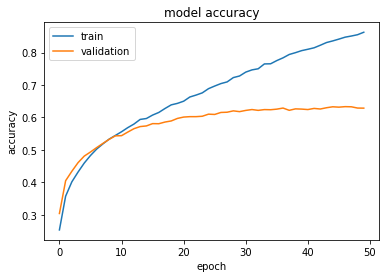

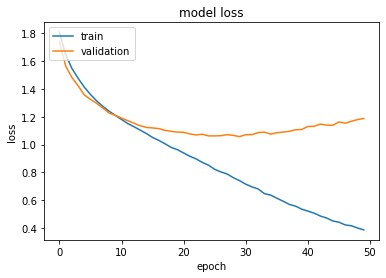

In [13]:
import matplotlib.pyplot as plt
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Salvando modelo gerado

In [15]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')